# EDA

### Import Relevant Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in web scraped file
df = pd.read_parquet('./Data/draft0522.parquet')

### Assign rounds 1-3 as class 2, rounds 4-7 as class 1 ad undrafted players as class 0

In [4]:
df.Round[df.Round <= 3] = 2

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\3966324326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Round[df.Round <= 3] = 2


In [5]:
df.Round[df.Round == 8] = 0

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\3336013768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Round[df.Round == 8] = 0


In [6]:
df.Round[df.Round >= 4] = 1

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\1495473621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Round[df.Round >= 4] = 1


### Balance of Classes

In [7]:
df.Round.value_counts(normalize=True)

0.0    0.358002
1.0    0.349761
2.0    0.292237
Name: Round, dtype: float64

### Create DataFrame for just combine information

In [10]:
combine = df[['player','college_conference','pos','Round','height','weight','speed','agility','alt_agility','vertical','bench_reps','broad_jump','forty_yd','cone','shuttle','Age']]

### Brief look at athletic profiling by round class by conferences

In [12]:
combine.groupby(['Round','college_conference']).mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\2287022228.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine.groupby(['Round','college_conference']).mean()


height      weight  \
Round college_conference                                                     
1.0   American Athletic Conference                   72.771930  220.965517   
      Atlantic Coast Conference                      73.786070  241.363184   
      Big East                                       72.722222  239.055556   
      Big Sky Conference                             74.636364  239.909091   
      Big South Conference                           72.600000  215.600000   
...                                                        ...         ...   
2.0   Southland Conference                           70.000000  183.500000   
      Southwestern Athletic Conference               77.000000  314.000000   
      Sun Belt Conference                            73.000000  227.545455   
      Western Athletic Conference                    74.600000  255.000000   
      Wisconsin Intercollegiate Athletic Conference  74.000000  320.000000   

                                                          speed     agility  \
Round college_conference                                                      
1.0   American Athletic Conference                    97.717581  128.085066   
      Atlantic Coast Conference                       94.439012  129.930262   
      Big East                                        95.489396  132.725415   
      Big Sky Conference                              97.874520  140.182783   
      Big South Conference                            97.924385  126.906301   
...                                                         ...         ...   
2.0   Southland Conference                           100.608873  122.067165   
      Southwestern Athletic Conference               111.687858  118.898214   
      Sun Belt Conference                            103.055954  132.879923   
      Western Athletic Conference                    100.320004  137.835301   
      Wisconsin Intercollegiate Athletic Conference  103.223312  145.451452   

                                                     alt_agility   vertical  \
Round college_conference                                                      
1.0   American Athletic Conference                    123.785319  34.081633   
      Atlantic Coast Conference                       126.027642  33.137500   
      Big East                                        124.774267  32.384615   
      Big Sky Conference                              129.603558  33.400000   
      Big South Conference                            122.680237  34.200000   
...                                                          ...        ...   
2.0   Southland Conference                            115.166011  38.250000   
      Southwestern Athletic Conference                124.668517  32.000000   
      Sun Belt Conference                             124.110899  35.722222   
      Western Athletic Conference                     137.508878  32.600000   
      Wisconsin Intercollegiate Athletic Conference   149.302107  32.000000   

                                                     bench_reps  broad_jump  \
Round college_conference                                                      
1.0   American Athletic Conference                    17.565217  119.959184   
      Atlantic Coast Conference                       20.892086  116.025316   
      Big East                                        23.454545  114.769231   
      Big Sky Conference                              18.222222  116.700000   
      Big South Conference                            18.200000  121.800000   
...                                                         ...         ...   
2.0   Southland Conference                            16.000000  126.500000   
      Southwestern Athletic Conference                26.000000  107.500000   
      Sun Belt Conference                             21.500000  121.444444   
      Western Athletic Conference                     20.750000  110.000000   
      Wisconsin Intercollegiate Athle

### Athletic testing by round class

In [13]:
combine.groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\3341430684.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine.groupby('Round').mean()


,height,weight,speed,agility,alt_agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle,Age
Round,,,,,,,,,,,,
0.0,73.503244,237.049954,88.401341,123.765949,122.881392,32.091985,19.259958,113.540159,4.815307,7.299085,4.440916,NaN
1.0,73.771672,243.699811,94.601681,131.525983,128.218943,32.847725,20.975228,114.865316,4.761854,7.252012,4.399943,22.601182
2.0,74.157716,246.776145,99.821009,136.640225,132.612171,33.672163,21.771523,117.143781,4.713309,7.216081,4.376118,22.207612


There is a clear order in most features of the most athletic players being in class 2 and the least athletic players in class 0. This lines up with what we would expect. There seems to be a slightly bigger gap betweeen class 0 and 1 than class 1 and 2.

In [14]:
combine[combine.pos == 'QB'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\3943618426.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'QB'].groupby('Round').mean()


,height,weight,speed,agility,alt_agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle,Age
Round,,,,,,,,,,,,
0.0,74.335766,220.759124,81.766384,122.923839,121.280071,30.654762,17.416667,110.547619,4.832443,7.155126,4.366748,NaN
1.0,74.936842,222.210526,82.867480,127.204255,122.303127,30.822785,22.250000,110.307692,4.824719,7.147792,4.338182,23.066667
2.0,75.326531,225.234694,88.005132,134.060199,129.967868,31.760563,22.000000,113.757143,4.774368,7.034688,4.292769,22.447917


For QBs speed and cone agility times differentiate class 2 from the others while class 0 falls behind in strength

In [15]:
combine[combine.pos == 'RB'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\3685605720.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'RB'].groupby('Round').mean()


,height,weight,speed,agility,alt_agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle,Age
Round,,,,,,,,,,,,
0.0,70.074074,211.300926,94.727108,122.395618,118.053559,33.866667,18.934132,117.112360,4.598966,7.112119,4.328182,NaN
1.0,70.340314,212.713542,100.914417,130.214219,122.232216,34.063218,19.253333,118.420118,4.533135,7.056387,4.270783,22.317204
2.0,70.718750,216.609375,106.416123,135.664357,128.205362,35.360360,20.580645,121.571429,4.494355,6.963043,4.233600,21.821138


In [16]:
combine[combine.pos == 'WR'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\2877891251.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'WR'].groupby('Round').mean()


,height,weight,speed,agility,alt_agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle,Age
Round,,,,,,,,,,,,
0.0,72.988095,202.645833,94.313691,121.595025,118.194985,34.493127,13.861751,119.830986,4.556719,7.019786,4.288245,NaN
1.0,72.483146,200.936330,99.154397,125.933283,119.936630,35.246862,14.429412,121.008696,4.489344,6.939185,4.229140,22.440945
2.0,72.725738,202.843882,103.831506,129.223810,122.304337,36.266129,15.944444,123.280220,4.447568,6.921061,4.217071,21.965217


In [17]:
combine[combine.pos == 'TE'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\1251359511.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'TE'].groupby('Round').mean()


,height,weight,speed,agility,alt_agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle,Age
Round,,,,,,,,,,,,
0.0,76.063063,251.774775,93.551562,132.518077,134.351775,31.988095,19.500000,114.096386,4.824455,7.215775,4.426389,NaN
1.0,76.301587,252.055556,100.915024,138.564668,138.892433,33.055556,20.080808,115.680851,4.733739,7.141047,4.378539,22.644628
2.0,76.604396,252.725275,105.909475,142.923596,140.812565,34.410448,21.743243,118.830769,4.681667,7.120678,4.349000,22.277778


In [18]:
combine[combine.pos == 'OL'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\2880297968.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'OL'].groupby('Round').mean()


,height,weight,speed,agility,alt_agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle,Age
Round,,,,,,,,,,,,
0.0,76.473016,310.408228,79.140947,115.843286,126.051169,26.710744,24.131687,100.377119,5.309034,7.920463,4.832027,NaN
1.0,76.659155,313.326761,83.028905,124.878228,133.064907,27.774138,25.584229,102.604895,5.248806,7.781571,4.742148,22.805389
2.0,76.848185,313.676568,89.023617,131.509597,136.705506,28.775000,26.176955,105.258475,5.164520,7.723864,4.686930,22.500000


In [19]:
combine[combine.pos == 'DT'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\1432382243.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'DT'].groupby('Round').mean()


,height,weight,speed,agility,alt_agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle,Age
Round,,,,,,,,,,,,
0.0,74.788462,303.600000,85.775673,127.555307,132.495672,28.970238,26.060241,104.487805,5.168163,7.716301,4.684267,NaN
1.0,74.879699,309.263158,91.548388,135.054023,135.372723,28.969072,27.622449,104.673913,5.107521,7.724118,4.641647,22.630769
2.0,74.955882,308.595588,95.581917,134.546036,138.819182,29.407895,29.368932,105.935780,5.050821,7.649479,4.639697,22.367647


In [20]:
combine[combine.pos == 'DE'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\1567406051.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'DE'].groupby('Round').mean()


,height,weight,speed,agility,alt_agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle,Age
Round,,,,,,,,,,,,
0.0,75.598131,268.056075,93.485731,132.212056,133.550314,31.310976,22.376471,111.439024,4.897451,7.384507,4.498194,NaN
1.0,75.628788,267.121212,98.900666,139.989576,136.730430,33.203883,23.926606,114.592233,4.827656,7.309341,4.424783,22.65873
2.0,76.116438,269.369863,105.053192,145.433524,143.801102,33.422131,24.471154,117.453782,4.764500,7.224717,4.403585,22.20979


In [21]:
combine[combine.pos == 'EDGE'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\3572871084.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'EDGE'].groupby('Round').mean()


,height,weight,speed,agility,alt_agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle,Age
Round,,,,,,,,,,,,
0.0,74.833333,250.277778,92.994933,140.766804,128.953567,32.363636,22.642857,114.250000,4.825714,7.316667,4.357500,NaN
1.0,75.652174,252.565217,106.496813,136.932582,141.426551,34.675000,23.133333,119.789474,4.672632,7.082727,4.380714,22.727273
2.0,75.916667,253.166667,113.688929,147.334700,143.960990,35.026316,22.916667,122.789474,4.598235,7.062000,4.310000,22.347826


In [22]:
combine[combine.pos == 'LB'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\587442158.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'LB'].groupby('Round').mean()


,height,weight,speed,agility,alt_agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle,Age
Round,,,,,,,,,,,,
0.0,73.330396,238.118943,92.567227,133.369722,127.855608,32.823529,20.752941,115.542373,4.770048,7.200597,4.359420,NaN
1.0,73.531250,240.050781,99.776466,141.634222,133.712690,33.995327,22.849057,117.247706,4.690210,7.126848,4.304024,22.636000
2.0,73.876190,242.066667,105.574229,146.731371,137.462025,35.404624,22.690789,120.304598,4.633520,7.075075,4.273066,22.246377


In [23]:
combine[combine.pos == 'CB'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\580484838.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'CB'].groupby('Round').mean()


,height,weight,speed,agility,alt_agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle,Age
Round,,,,,,,,,,,,
0.0,71.154286,190.708571,89.653965,123.907290,112.758989,35.190647,13.422222,120.681481,4.545854,6.967097,4.196701,NaN
1.0,71.175926,193.125000,95.758811,127.334519,116.283439,35.811377,15.142857,122.006173,4.483786,6.941440,4.187846,22.458537
2.0,71.558559,194.747748,99.933313,135.329425,120.245162,36.516854,15.449704,124.066667,4.446959,6.880362,4.130417,22.101382


In [24]:
combine[combine.pos == 'DB'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\1703419566.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'DB'].groupby('Round').mean()


,height,weight,speed,agility,alt_agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle,Age
Round,,,,,,,,,,,,
0.0,71.000000,192.250000,88.548204,115.598568,110.380689,35.532258,13.592593,122.419355,4.569,7.049000,4.280968,NaN
1.0,72.166667,200.083333,91.268843,114.416572,111.676351,36.153846,16.181818,125.818182,4.572,7.115455,4.332727,21.923077
2.0,72.600000,198.133333,103.156264,115.934135,116.216195,36.566667,14.600000,126.133333,4.430,6.989000,4.312000,21.785714


In [25]:
combine[combine.pos == 'S'].groupby('Round').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\2438189165.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine[combine.pos == 'S'].groupby('Round').mean()


,height,weight,speed,agility,alt_agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle,Age
Round,,,,,,,,,,,,
0.0,71.973154,205.711409,91.139147,125.597581,117.300861,34.178571,16.491379,118.653226,4.615324,7.060645,4.263776,NaN
1.0,72.300000,207.747059,98.399385,133.797346,122.698252,35.691489,17.482759,121.414286,4.537962,6.990686,4.210392,22.442424
2.0,72.377193,207.807018,102.417802,138.857501,126.211454,36.717391,16.814815,123.636364,4.495149,6.909273,4.168750,22.063063


In [26]:
combine.groupby('college_conference').mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\3304860561.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine.groupby('college_conference').mean()


,Round,height,weight,speed,agility,alt_agility,vertical,bench_reps,broad_jump,forty_yd,cone,shuttle,Age
college_conference,,,,,,,,,,,,,
American Athletic Conference,1.447619,73.336538,229.590476,98.568315,131.582385,128.206450,34.126437,18.960526,120.069767,4.641319,7.130469,4.338594,22.475728
Atlantic Coast Conference,1.468421,74.100529,244.851852,97.350592,131.976086,129.089104,33.282392,21.366038,116.822148,4.736599,7.255841,4.405190,22.230769
Big East,1.590909,73.318182,240.318182,99.335767,136.320756,133.786422,33.400000,23.333333,116.714286,4.689091,7.154815,4.346452,22.340909
Big Sky Conference,1.214286,74.642857,235.000000,99.500505,140.585017,127.880187,33.576923,18.300000,117.923077,4.653571,7.035000,4.259091,22.714286
Big South Conference,1.000000,72.600000,215.600000,97.924385,126.906301,122.680237,34.200000,18.200000,121.800000,4.578000,7.058000,4.292000,22.600000
Big Ten Conference,1.525126,74.268844,248.698492,98.102442,138.033027,133.712216,33.491429,21.424561,116.685246,4.738736,7.235690,4.375904,22.243523
Big Twelve Conference,1.500000,73.853448,245.254310,98.286343,133.761370,130.755450,33.583784,21.703030,117.108696,4.729009,7.253942,4.403586,22.436123
Central Intercollegiate Athletic Association,1.000000,75.000000,195.000000,92.612967,NaN,NaN,36.000000,NaN,124.000000,4.530000,NaN,NaN,22.000000
Colonial Athletic Association,1.300000,73.850000,244.750000,95.135846,132.269231,124.599205,32.562500,19.466667,115.562500,4.770000,7.287333,4.392667,22.350000


C:\Users\capta\AppData\Local\Temp\ipykernel_21140\1085805742.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine.corr().abs(),annot=True);


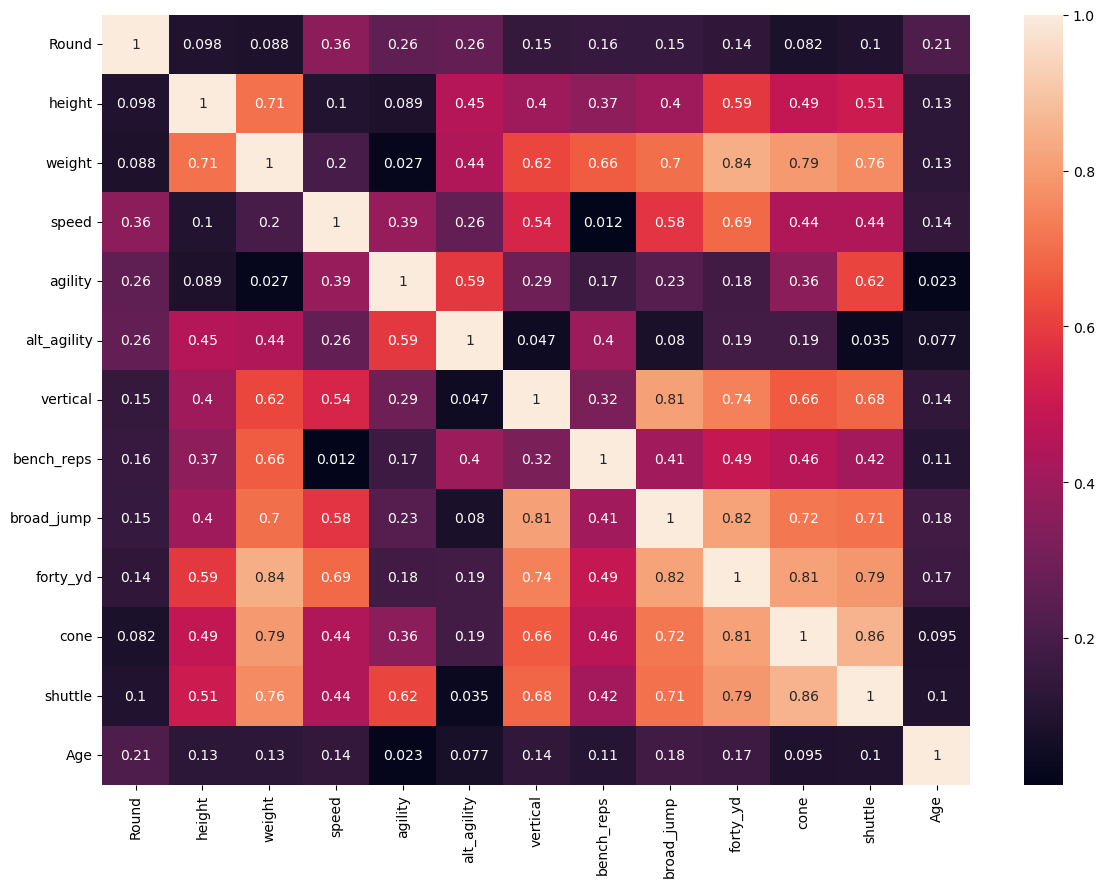

In [27]:
plt.figure(figsize=(14,10))
sns.heatmap(combine.corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\335694056.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'QB'].corr().abs(),annot=True);


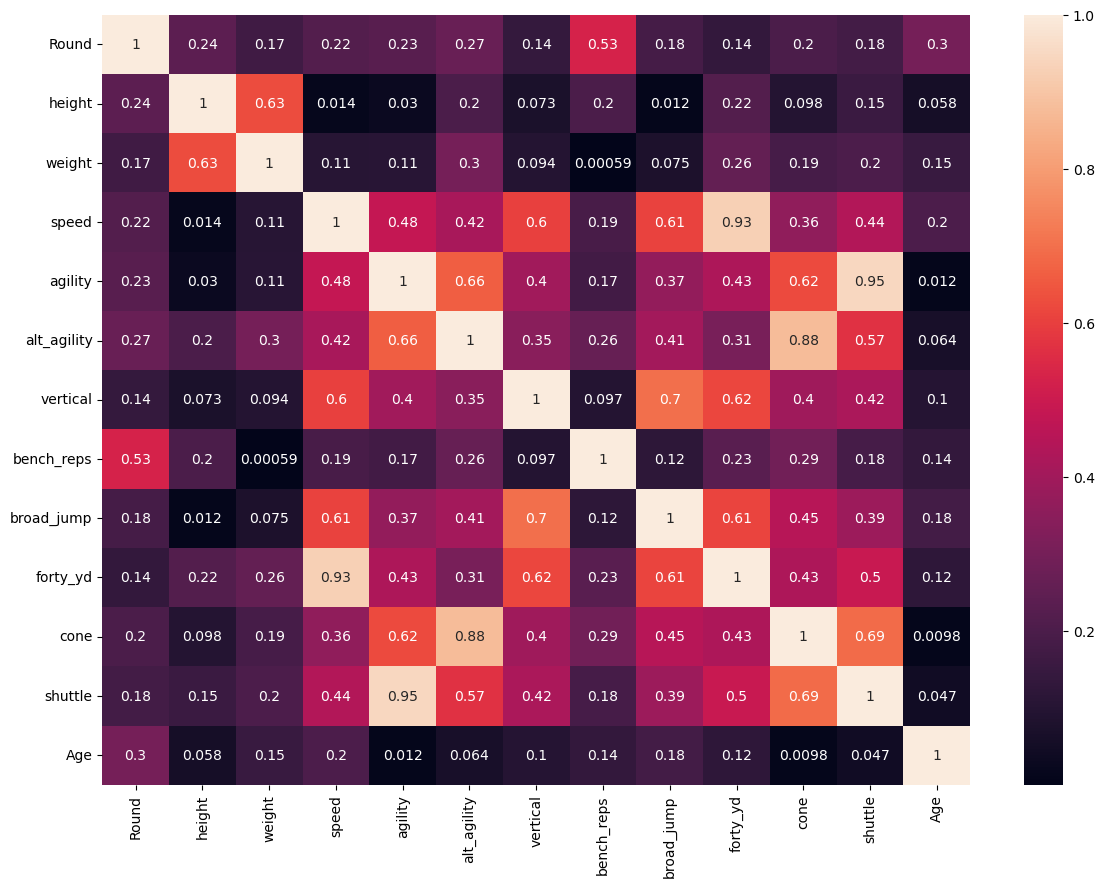

In [28]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'QB'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\2060570500.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'RB'].corr().abs(),annot=True);


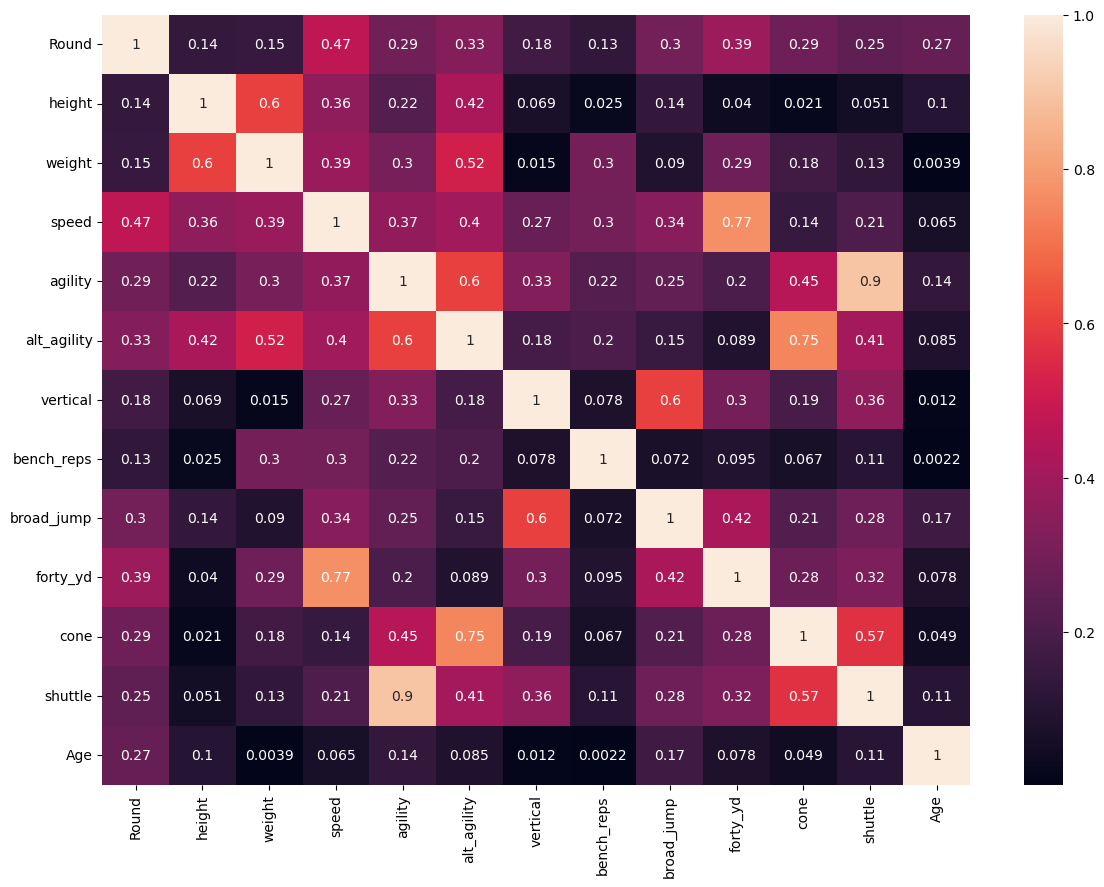

In [29]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'RB'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\2538329814.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'WR'].corr().abs(),annot=True);


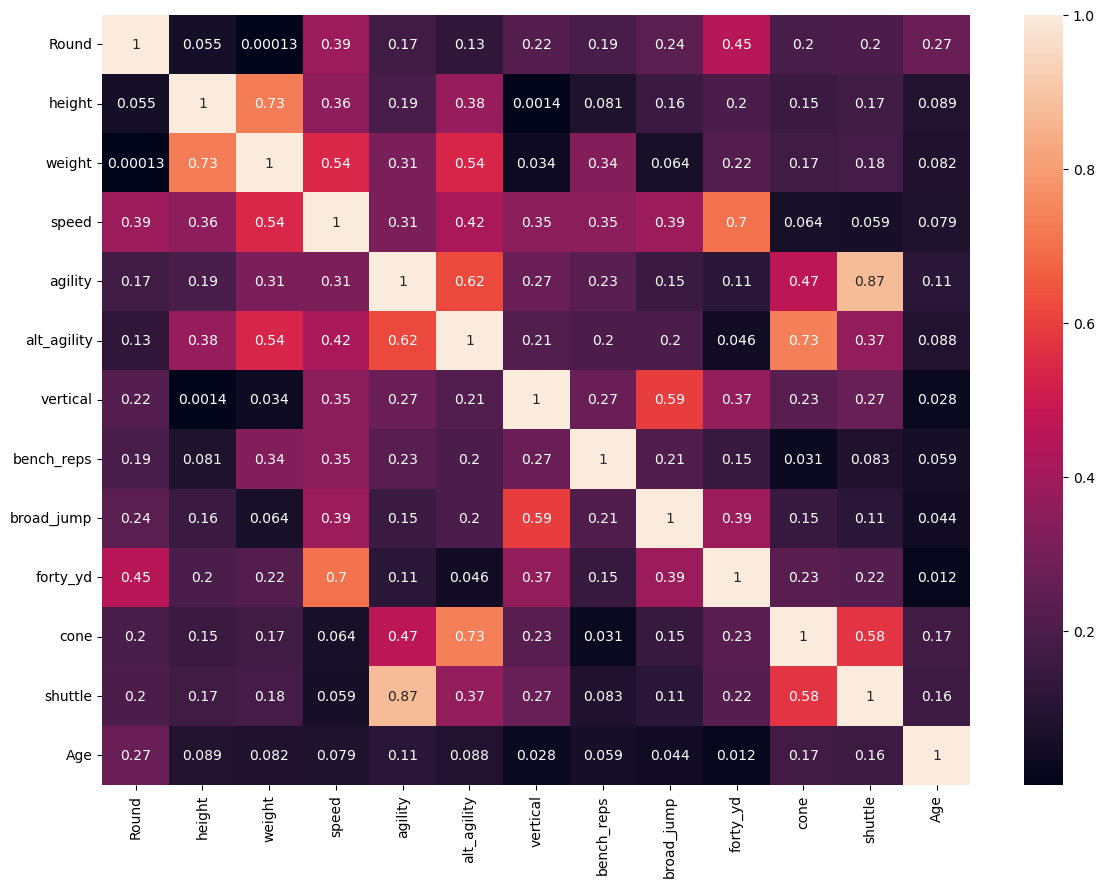

In [30]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'WR'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\4265659709.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'TE'].corr().abs(),annot=True);


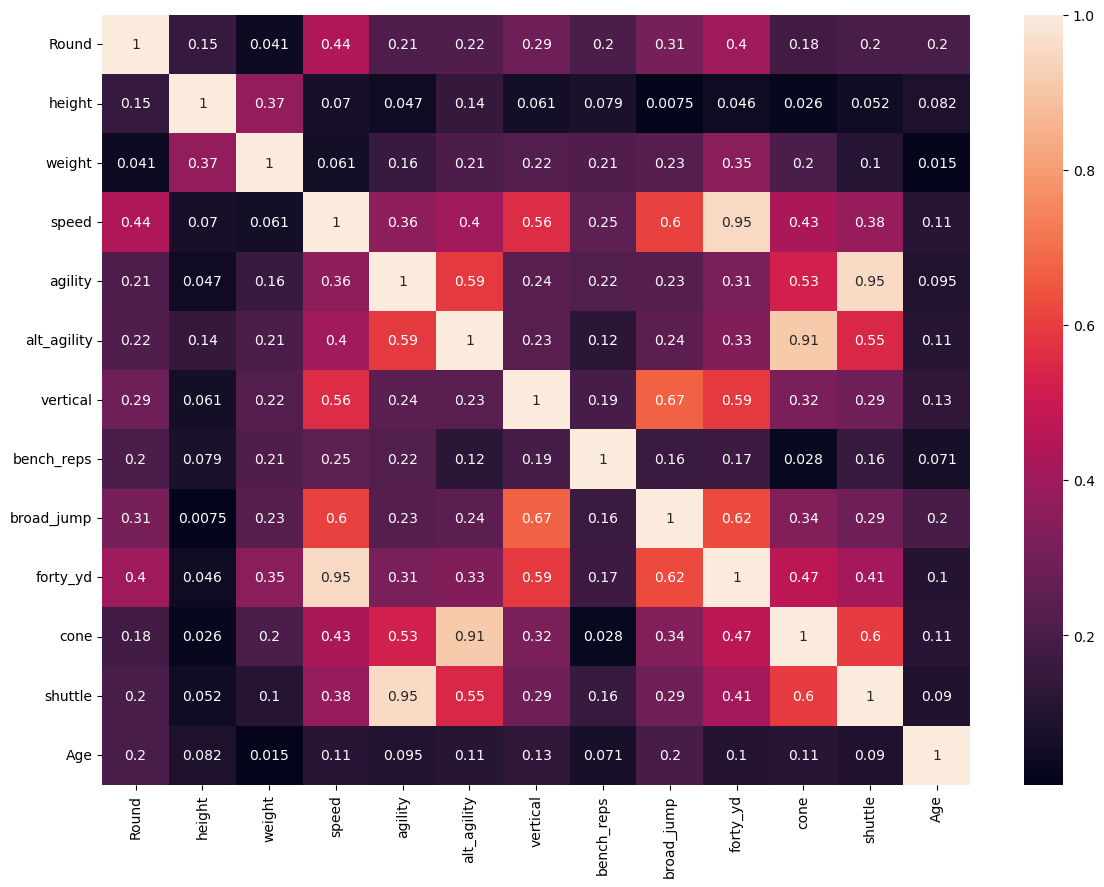

In [31]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'TE'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\2779586782.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'OL'].corr().abs(),annot=True);


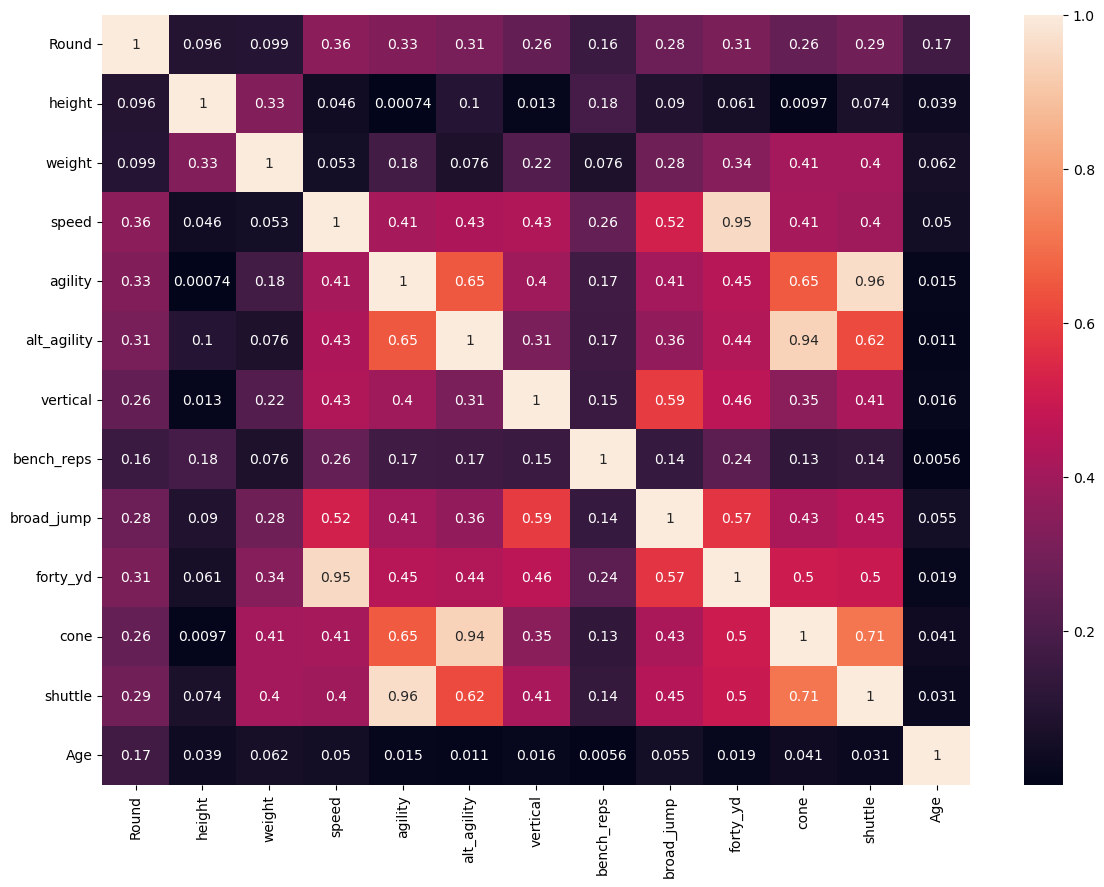

In [32]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'OL'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\1482279189.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'DL'].corr().abs(),annot=True);


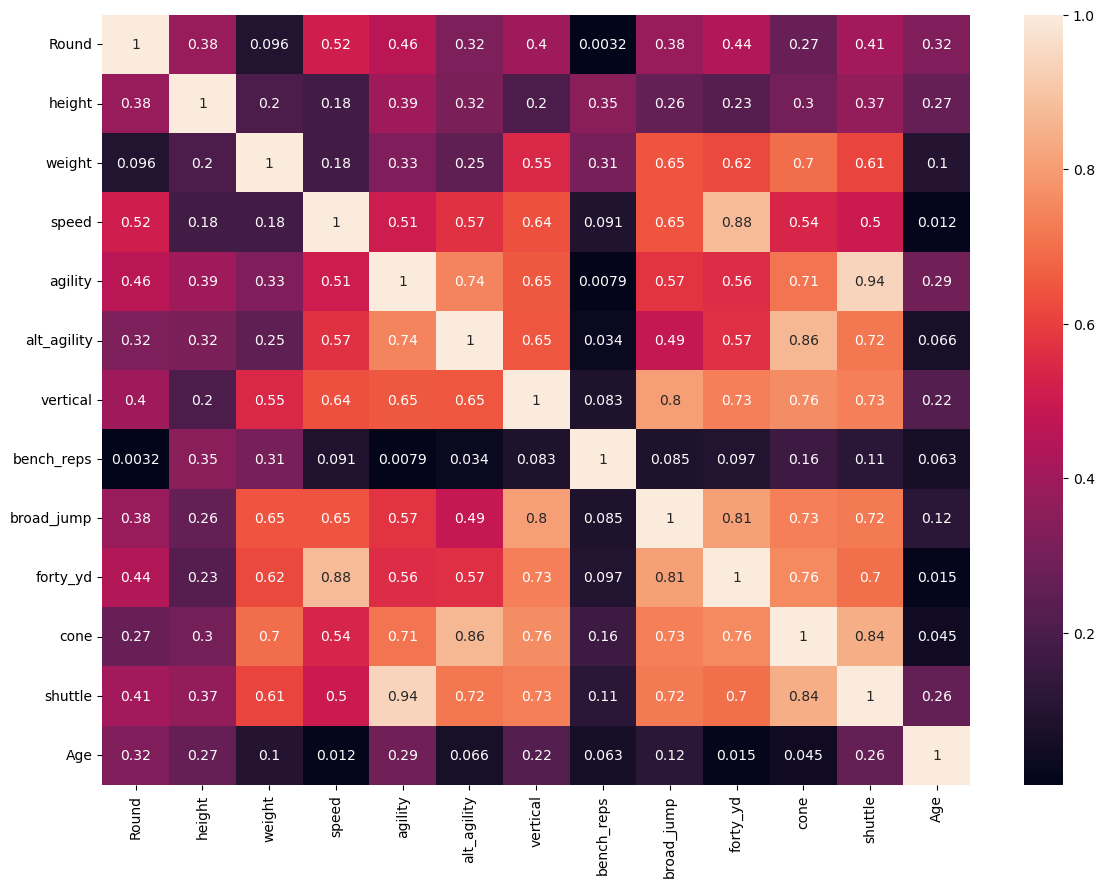

In [33]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'DL'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\736944607.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'DE'].corr().abs(),annot=True);


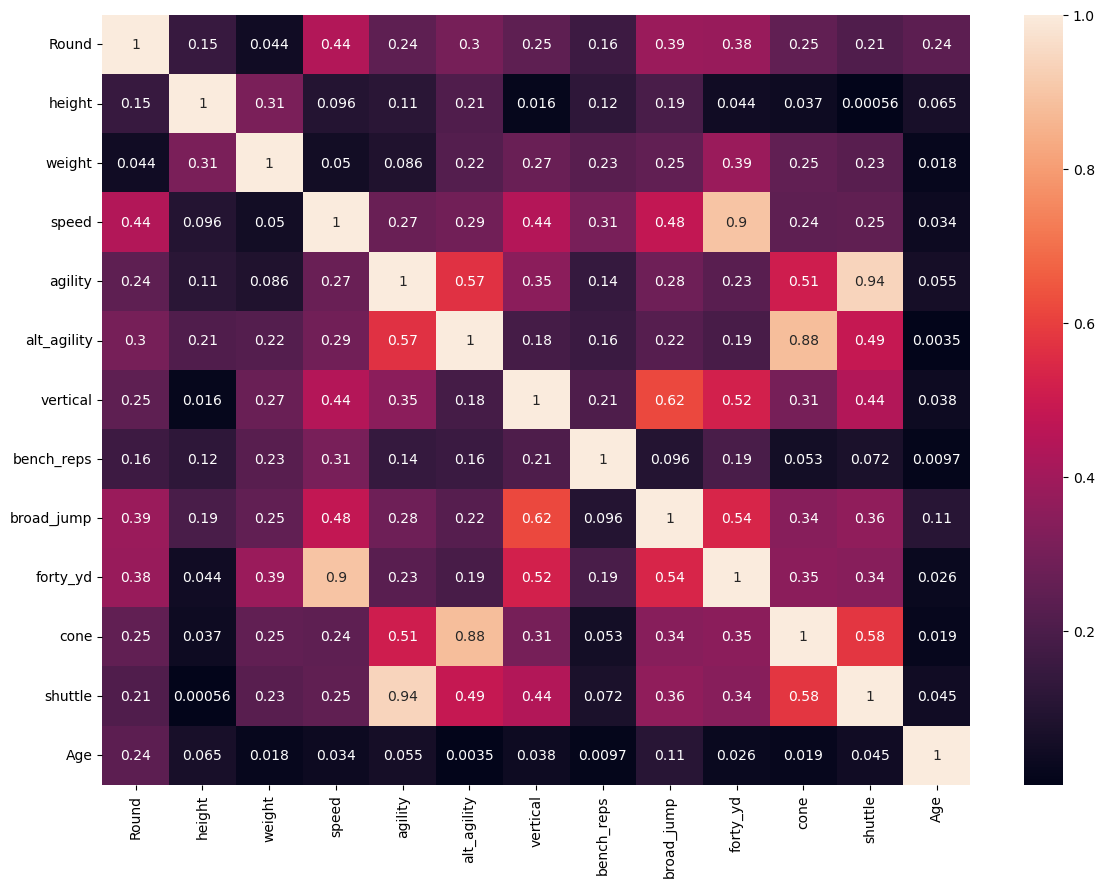

In [34]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'DE'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\1040784863.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'EDGE'].corr().abs(),annot=True);


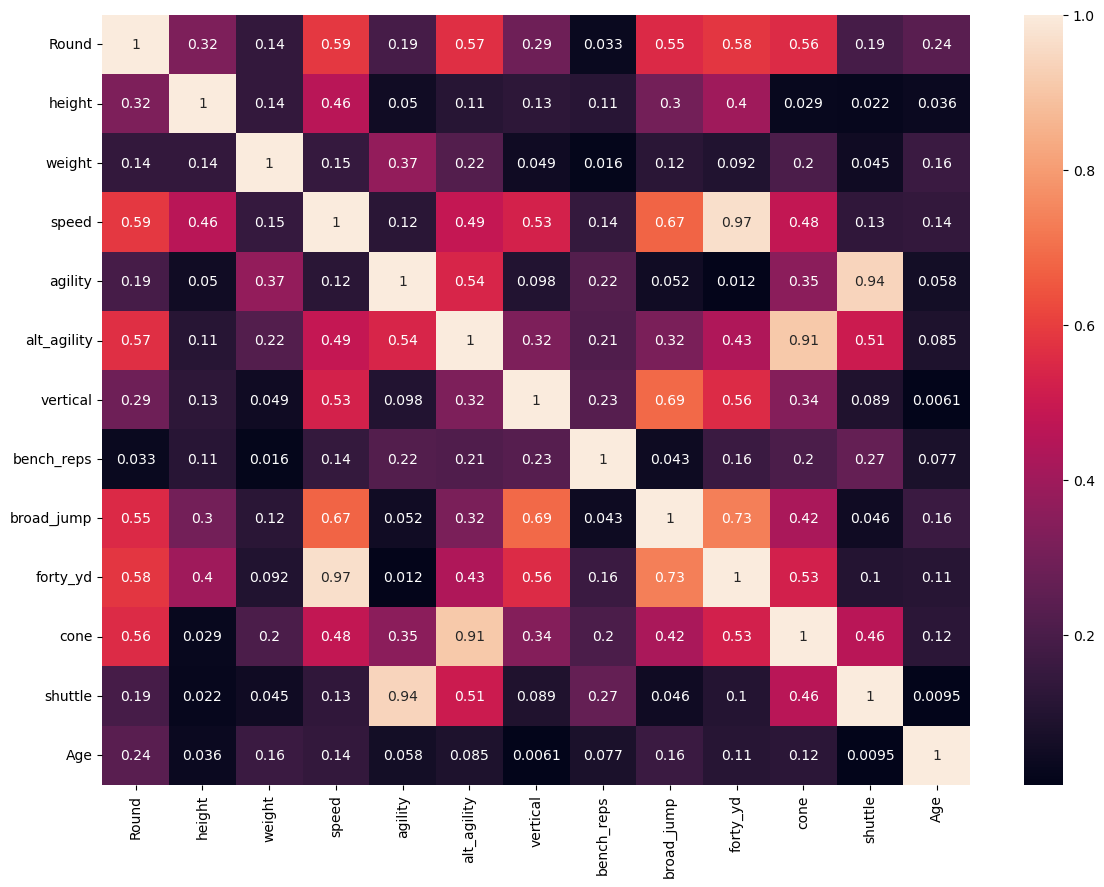

In [35]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'EDGE'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\692367660.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'LB'].corr().abs(),annot=True);


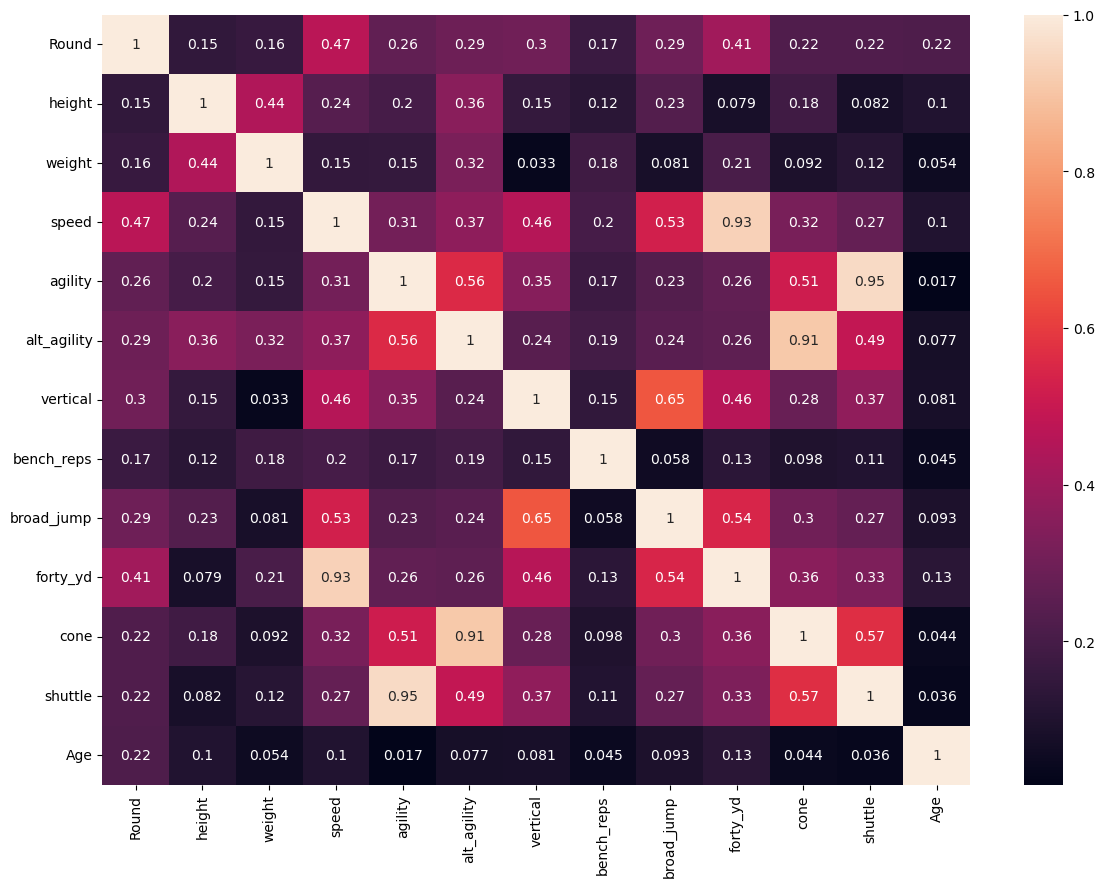

In [36]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'LB'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\3658448629.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'CB'].corr().abs(),annot=True);


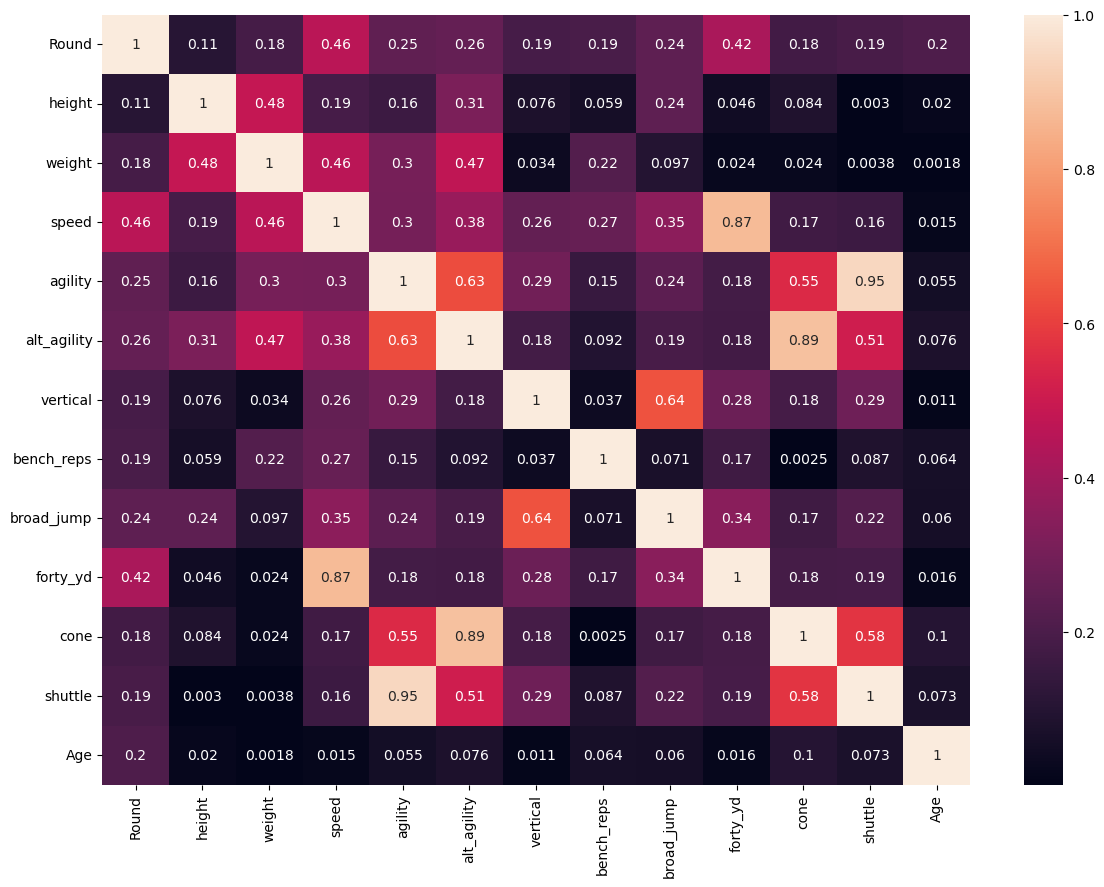

In [37]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'CB'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\106728163.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'DB'].corr().abs(),annot=True);


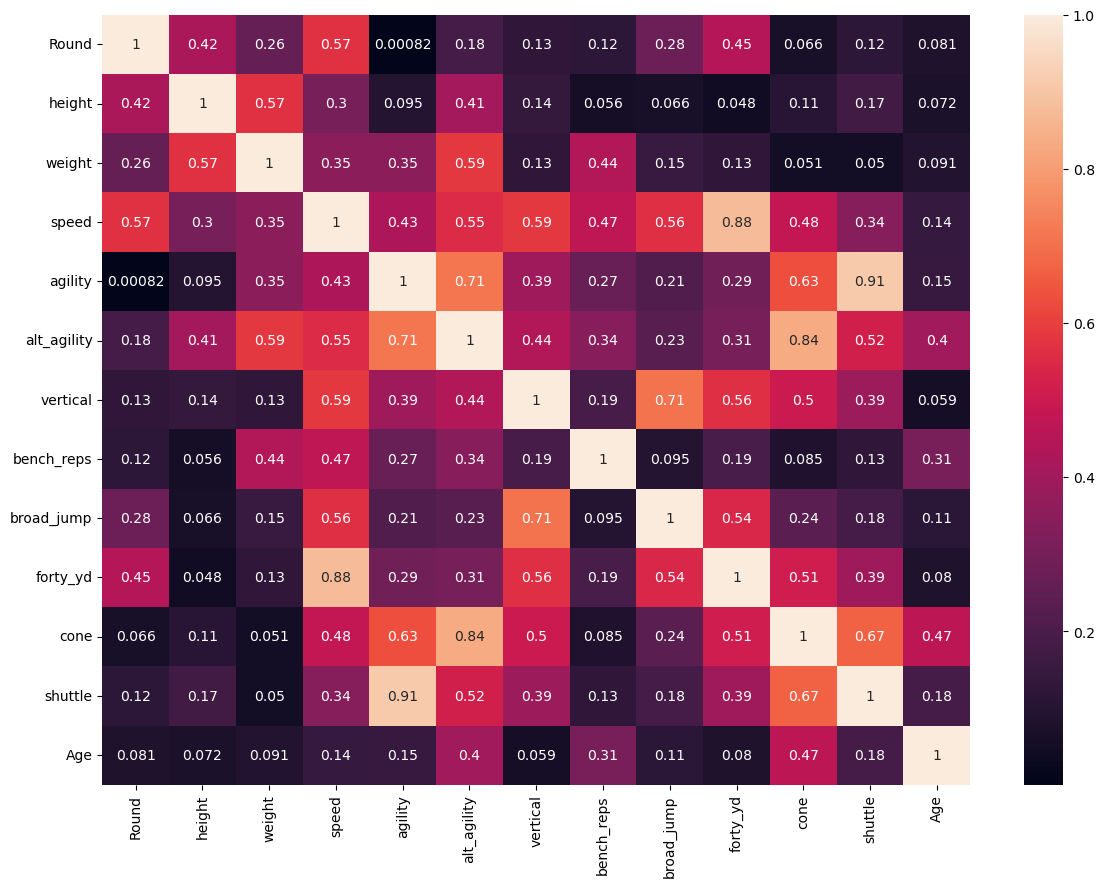

In [38]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'DB'].corr().abs(),annot=True);

C:\Users\capta\AppData\Local\Temp\ipykernel_21140\159827862.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine[combine.pos == 'S'].corr().abs(),annot=True);


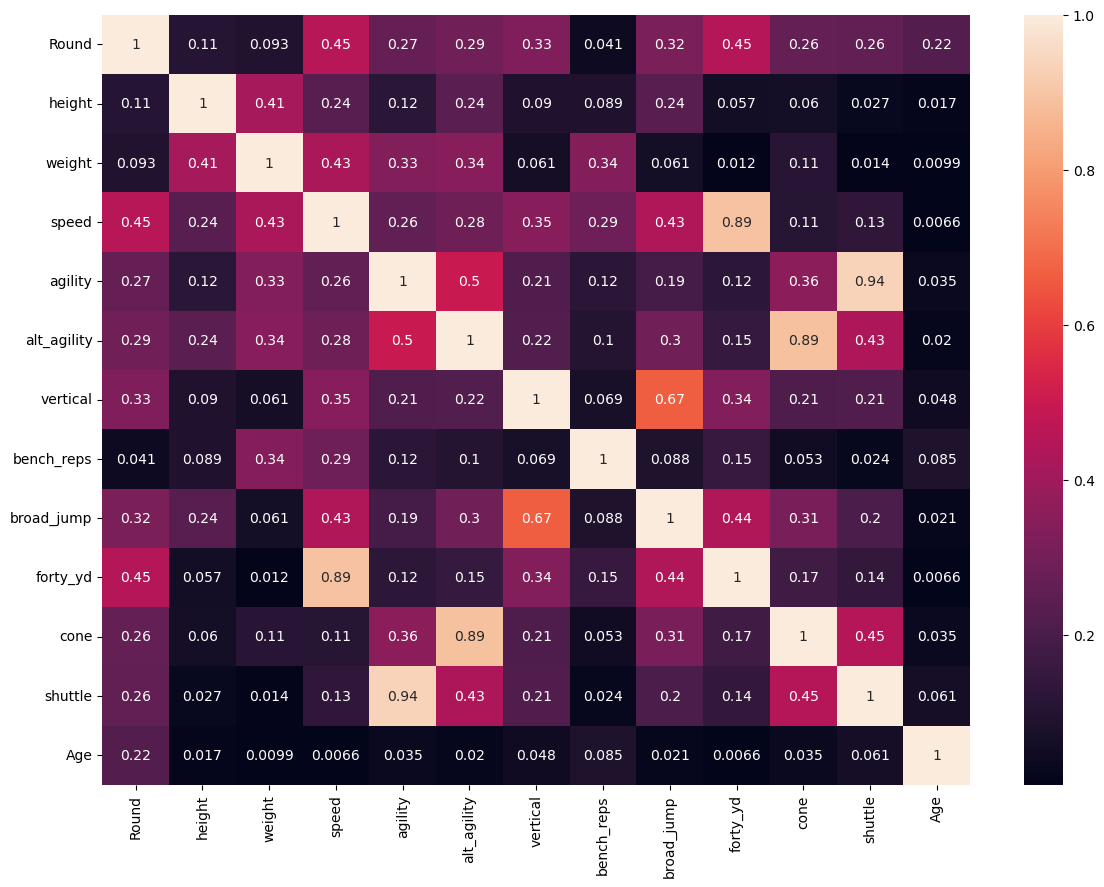

In [39]:
plt.figure(figsize=(14,10))
sns.heatmap(combine[combine.pos == 'S'].corr().abs(),annot=True);

In [40]:
combine.college_conference.value_counts()

Southeastern Conference                             583
Big Ten Conference                                  398
Atlantic Coast Conference                           380
Pacific Twelve Conference                           345
Big Twelve Conference                               234
American Athletic Conference                        105
Mountain West Conference                             93
Conference USA                                       79
Independent                                          69
Mid-American Conference                              52
Big East                                             44
Sun Belt Conference                                  31
Missouri Valley Football Conference                  23
Colonial Athletic Association                        20
Southern Conference                                  15
Western Athletic Conference                          14
Big Sky Conference                                   14
Mid-Eastern Athletic Conference                 